In [189]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pkenken as kenken
import random
import copy
import notdsort

In [94]:
#Cargamos el tablero y visualizamos
input_file = r'board1.txt'
board = kenken.parse_kenken(input_file)
#kenken.plot_board(board)

In [190]:
#Generamos una respuesta

#Primero buscamos todas las permutaciones posibles dado el tablero
rango = [x+1 for x in range(board.n)]
renglones = list(itertools.permutations(rango))
#len(renglones)
#print(renglones)

In [167]:
class Individual:
    def __init__(self,tam,permutaciones):
        self.tablero = []
        
        ind_ant = random.randint(0,tam-1)
        for _ in range(tam):
            ind_act = random.randint(0,len(permutaciones)-1)
            while(ind_act == ind_ant):
                ind_act = random.randint(0,len(permutaciones)-1) 
            self.tablero.append(permutaciones[ind_act])
            ind_ant = ind_act
        
        self.tam = tam
        self.fitness = [0,0]
        
    def crossover(self,I2):
        pcr = random.randint(1,self.tam-1)
        
        H1 = self.tablero[:pcr]
        Hh2 = I2.tablero[pcr:]
        for ren in Hh2:
            H1.append(ren)
            
    
        H2 = I2.tablero[:pcr]
        Hh1 = self.tablero[pcr:]
        for ren in Hh1:
            H2.append(ren)


        HI1=copy.deepcopy(self)
        HI2=copy.deepcopy(self)

        HI1.tablero = H1 
        HI2.tablero = H2
        return HI1,HI2

    def mutation(self,permutaciones):
        pmt = random.randint(0,self.tam-1)
        self.tablero[pmt] = permutaciones[random.randint(0,len(permutaciones)-1)]
        
    def calcfitness(self,board):
        board.load_solution(self.tablero)
        
        suma = 0
        for i in range(len(board.cages)):
            dif = board.cages[i].evaluate2() - board.cages[i].result
            if dif<0:
                dif*=-1
            suma += dif
       
        self.fitness[0]=suma
        self.fitness[1]=len(board.evaluate()[2])
        

In [168]:
def dominates(p1,p2):
    M = len(p1.fitness)
    mejor = False
    for m in range(M):
        if p1.fitness[m] > p2.fitness[m]:
            return False
        if p1.fitness[m] < p2.fitness[m]:
            mejor = True
    return mejor

40
[[9], [3, 26, 27, 34, 35], [7, 14], [10], [15, 17], [4, 16], [6, 19], [11, 12], [1, 20, 21, 30, 31, 36, 37], [0, 2, 22, 23, 24, 25, 28, 29, 32, 33, 38, 39], [13], [18], [8], [5]]
--------------------------------------------------------------------------------------
40
[[0, 19, 22, 23, 24, 25, 36, 37], [1, 2, 20, 21, 28, 29, 30, 31, 32, 33, 34, 35], [6, 7], [8], [3, 5, 10, 26, 27, 38, 39], [9, 12], [11, 13, 14], [15, 16], [17], [4], [18]]
--------------------------------------------------------------------------------------
40
[[1, 5, 19, 20, 21, 26, 27, 32, 33], [0, 3, 28, 29, 30, 31, 34, 35], [13], [8, 9, 11], [10, 16, 17, 18], [2, 4, 6, 22, 23, 24, 25, 36, 37, 38, 39], [14], [15], [12], [7]]
--------------------------------------------------------------------------------------
40
[[4, 14], [1, 2, 3, 7, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 38, 39], [8, 9, 10, 16], [0, 17, 34, 35, 36, 37], [13, 15, 18], [5, 19], [6, 11], [12]]
-------------------------------------

40
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [19], [18]]
--------------------------------------------------------------------------------------
40
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [19], [18]]
--------------------------------------------------------------------------------------
40
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [18]]
--------------------------------------------------------------------------------------
40
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], [19]]
--------------------------------------------------------------------------------------
40
[[0, 1, 2, 3,

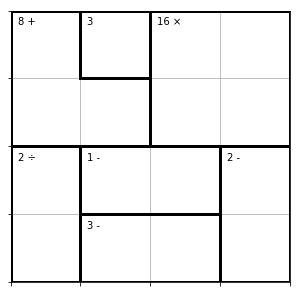

In [207]:
N= 20
pM = .9
G = 60
tam = board.n
Poblacion = [Individual(tam,renglones) for i in range(N)]

for i in range(G):
    for tab in Poblacion:
        tab.calcfitness(board)
    offspring = []
    for j in range(N//2):
        torneo = []
        for i in range(2):
            cont1 = Poblacion[random.randint(0,tam-1)]
            cont2 = Poblacion[random.randint(0,tam-1)]
            if(dominates(cont1,cont2)):
                torneo.append(cont1)
            elif(dominates(cont2,cont2)):
                torneo.append(cont2)
            else:
                torneo.append(cont1)
        
        H1,H2 = torneo[0].crossover(torneo[1])

        if random.random() <= pM:
            H1.mutation(renglones)
        if random.random() <= pM:
            H2.mutation(renglones)
    
        offspring.append(H1)
        offspring.append(H2)
    plebada = Poblacion + offspring
    #ordenar plebada multiobjetivo
    puntos =[ind.fitness for ind in plebada]
    print(len(plebada))
    sets = notdsort.nondominatedsort(puntos)
    print(sets)
    print("--------------------------------------------------------------------------------------")
    Poblacion2 = []
    for sett in sets:
        for ind in sett:
            if len(Poblacion2)<N:
                Poblacion2.append(plebada[ind])
    #frente = [[[plebada[i].fitness[0],plebada[i].fitness[1]],i]for i in range(len(plebada))]
        
    #truncar a tamaño N
    Poblacion = Poblacion2[:N]
        
sol = Poblacion[0].tablero
print(sol)
sol2 = []
for e in sol:
    sol2.append(list(e))
    
print(sol2)
board.load_solution(sol2)
kenken.plot_board(board)
    